In [ ]:
# EXTRACT AND PRINT ENTRIES FROM EXAMPLE WET FILE

import gzip

def read_wet_entries(filepath, num_entries=25):
    entries = []
    current_entry = []
    entry_count = 0
    
    with gzip.open(filepath, 'rt', encoding='utf-8') as f:
        for line in f:
            if line.startswith('WARC/1.0'):
                if current_entry:  # Save previous entry
                    entries.append(''.join(current_entry))
                    entry_count += 1
                    if entry_count >= num_entries:
                        break
                current_entry = [line]  # Start new entry
            else:
                current_entry.append(line)
    
    # Add the last entry if we haven't reached the limit
    if current_entry and entry_count < num_entries:
        entries.append(''.join(current_entry))
    
    return entries

# Usage
entries = read_wet_entries('/data/CC/example.warc.wet.gz', 26)
print(f"Read {len(entries)} entries")

print(f"{'idx':<5}\t{'Language:<12'}\t{'WARC-Type:<12'}\t{'Domain Name:'}")

for i, entry in enumerate(entries):
  lines = entry.split("\n")
  warc_type = ""
  language = ""
  domain_name = ""

  for line in lines:

    if line.startswith("WARC-Type:"):
      warc_type = line.split(":")[1].strip()
    elif line.startswith("WARC-Identified-Content-Language:"):
      language = line.split(":")[1].strip()
    elif line.startswith("WARC-Target-URI:"):
      domain_name = line
      
  print(f"{i:<5}\t{language:<12}\t{warc_type:<12}\t{domain_name}")

print("-"*100)

for entry in entries:
    print(entry)
    print("-"*100)

In [5]:
with open('data/cooking.stackexchange.txt', 'rb') as f:
    lines = f.readlines(1024*10)

for line in lines:
    print(line)


b'__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?\n'
b'__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments\n'
b'__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?\n'
b'__label__restaurant Michelin Three Star Restaurant; but if the chef is not there\n'
b'__label__knife-skills __label__dicing Without knife skills, how can I quickly and accurately dice vegetables?\n'
b"__label__storage-method __label__equipment __label__bread What's the purpose of a bread box?\n"
b'__label__baking __label__food-safety __label__substitutions __label__peanuts how to seperate peanut oil from roasted peanuts at home?\n'
b'__label__chocolate American equivalent for British chocolate terms\n'
b'__label__baking __label__oven __label__convection Fan bake vs bake\n'
b'__label__sauce __label__storage-lifetime __label__acidity __label__mayonnaise Regulation and balancing of readymade packe

In [6]:
import gzip


i = 0

with gzip.open('data/wiki/unfiltered_positive_samples.warc.gz', 'r') as f:
    for line in f:
        print(line)
        i += 1
        if i > 1000:
            break


b'WARC/1.0\r\n'
b'WARC-Type: warcinfo\r\n'
b'Content-Type: application/warc-fields\r\n'
b'WARC-Date: 2025-05-12T05:48:34Z\r\n'
b'WARC-Record-ID: <urn:uuid:1EDD7D97-1E65-4F95-927C-BEF52CD2C818>\r\n'
b'WARC-Filename: subsampled_positive_urls.warc.warc.gz\r\n'
b'WARC-Block-Digest: sha1:IGNFZ6C2RV6VM32QSJOQWY2C7FG7MJBT\r\n'
b'Content-Length: 315\r\n'
b'\r\n'
b'software: Wget/1.24.5 (darwin23.2.0)\r\n'
b'format: WARC File Format 1.0\r\n'
b'conformsTo: http://bibnum.bnf.fr/WARC/WARC_ISO_28500_version1_latestdraft.pdf\r\n'
b'robots: classic\r\n'
b'wget-arguments: "--timeout=5" "-i" "data/wiki/subsampled_positive_urls.txt" "--warc-file=data/wiki/subsampled_positive_urls.warc" "-O" "/dev/null" \r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'WARC/1.0\r\n'
b'WARC-Type: request\r\n'
b'WARC-Target-URI: <https://web.archive.org/web/20151222162432/http://oee.nrcan.gc.ca/publications/statistics/trends10/chapter3.cfm>\r\n'
b'Content-Type: application/http;msgtype=request\r\n'
b'WARC-Date: 2025-05-12T05:48:34Z\r\n'
b'W

In [1]:
import gzip
from warcio.archiveiterator import ArchiveIterator

path = './data/wiki/unfiltered_positive_samples.warc.gz'
docs_downloaded = 0

with gzip.open(path, "rb") as stream:
    compressed_stream = stream.fileobj
    for record in ArchiveIterator(stream):
        # Only HTML responses
        if record.rec_type != "response":
            continue
        ctype = record.http_headers.get_header("Content-Type", "")
        if not ctype.startswith("text/html"):
            continue

        docs_downloaded += 1

print(f"Downloaded {docs_downloaded} docs")

Downloaded 23736 docs


Total tokens: 9761402
Special tokens: {'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}
Unique token IDs: 48671
Top-10 token IDs & counts: [(13, 398914), (262, 355318), (11, 349958), (284, 198879), (290, 187589), (198, 185868), (286, 172851), (257, 161625), (287, 125901), (12, 85323)]
Top-10 token strings: ['.', 'Ġthe', ',', 'Ġto', 'Ġand', 'Ċ', 'Ġof', 'Ġa', 'Ġin', '-']


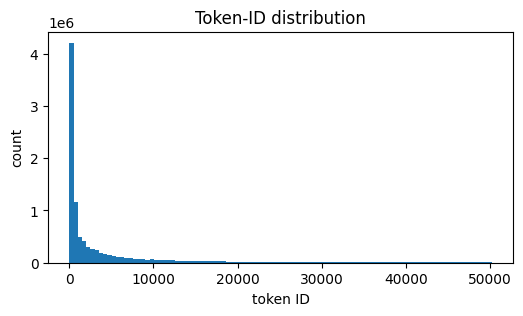

— slice at 8170330 —
 a conventional car battery, it's powered by a canister containing solid hydrogen that looks similar to the small butane canisters used in camping stoves.
Developed with Japan's New Energy and Industrial Technology Development Organization (NEDO), it has a couple of USB outputs and two conventional AC outputs. This charger is being eyed for use after disasters, like 2011's earthquake and tsunami that hit Japan.
The final charger is a long-life type designed for use in remote areas, such

— slice at 7434384 —
 of an up-and-comer. Yet with her most recent role playing opposite Will Smith in the acclaimed Concussion, the actor proved that she's here to stay — and while in Hollywood, she's going to change the nature of what we see on-screen. Mbatha-Raw is half South African and half white, and as a biracial woman, she fails to fit neatly into Hollywood's pre-determined ethnic and racial roles, a truth she learned quickly when she first starting

— slice at 8662570 —
 w

In [19]:
import numpy as np
from transformers import AutoTokenizer
from collections import Counter
import matplotlib.pyplot as plt

# 1. Load your tokens (either via memmap or np.load with mmap_mode)
data_path = "/data/paloma/tokenized_paloma_c4_100_domains_validation.npy"
tokens = np.memmap(data_path, dtype=np.uint16, mode="r")   # shape: (N,)

# 2. Instantiate GPT-2 tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
print(f"Total tokens: {len(tokens)}")
print("Special tokens:", tokenizer.special_tokens_map)

# 3. Global stats
unique_ids = np.unique(tokens)
print(f"Unique token IDs: {len(unique_ids)}")
freq = Counter(tokens.tolist())
top10 = freq.most_common(10)
print("Top-10 token IDs & counts:", top10)
print("Top-10 token strings:", [tokenizer.convert_ids_to_tokens(i) for i,_ in top10])

# 4. (Optional) histogram of IDs
plt.figure(figsize=(6,3))
plt.hist(tokens, bins=100, color="C0")
plt.title("Token-ID distribution")
plt.xlabel("token ID")
plt.ylabel("count")
plt.show()

# 5. Decode a few random slices
for start in np.random.randint(0, len(tokens)-100, size=3):
    chunk = tokens[start:start+100]
    print("— slice at", start, "—")
    print(tokenizer.decode(chunk.tolist(), clean_up_tokenization_spaces=True))
    print()

# 6. Split into “documents” on the EOS token (id 50256) and inspect
eos = tokenizer.eos_token_id
boundaries = np.where(tokens == eos)[0]
docs = np.split(tokens, boundaries+1)
avg_doc_len = int(len(tokens) / len(docs))
print(f"Found {len(docs)} docs averaging {avg_doc_len:,} tok/doc (≈ segments between EOS). Showing first 3:")
for doc in docs[:3]:
    print(tokenizer.decode(doc.tolist()), "\n" + "-"*40)